In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('grb_data.csv')

In [9]:
df.head(20)

,GRB,Swift Trigger Number,BAT RA (J2000),BAT Dec (J2000),BAT T90,BAT Fluence (15-150 keV),BAT Photon Index (15-150 keV) (PL = simple power-law),Swift Comments,Redshift,Host Galaxy
0,180905A,859421,91.038,-4.592,165.3,42.0,1.6,-,-,-
1,180904A,859282,274.26,46.64,5.4,2.4,1.02,UVOT: no detection,-,-
2,180828A,856977,268.704,-25.791,14.0,88.0,0.89,UVOT: no detection,-,-
3,180823A,855434,210.358,14.901,80.3,78.0,1.58,UVOT: no detection,-,-
4,180821A,854578,7.739,-38.612,64.0,14.0,1.79,UVOT: no detection,-,-
5,180818B,853882,104.227,39.31,134.4,23.0,1.77,UVOT: no detection,-,-
6,180818A,853824,169.698,-48.344,13.7,2.6,2.15,UVOT: no detection,-,-
7,180812A,852903,245.839,74.674,16.51,8.0,1.22,-,-,-
8,180809B,852553,299.712,-15.293,233.2,730.0,1.26,-,-,-
9,180805B,851855,25.877,-17.475,122.5,9.6,1.13,UVOT: no detection,-,-


In [8]:
df['Swift Comments'].value_counts()

-                                                                                                                                                                                                                                                                                                            415
UVOT: no detection                                                                                                                                                                                                                                                                                           381
XRT: no detection|UVOT: no detection                                                                                                                                                                                                                                                                          11
No AT slew (Earth limb constraint)|UVOT: no detection                                

In [16]:
1

1

In [15]:
1

1

In [14]:
1

1

In [13]:
df['Detection'] = df['Swift Comments'].apply(lambda comment : "no detection" not in comment)
df.head()

,GRB,Swift Trigger Number,BAT RA (J2000),BAT Dec (J2000),BAT T90,BAT Fluence (15-150 keV),BAT Photon Index (15-150 keV) (PL = simple power-law),Swift Comments,Redshift,Host Galaxy,Detection
0,180905A,859421,91.038,-4.592,165.3,42.0,1.6,-,-,-,True
1,180904A,859282,274.26,46.64,5.4,2.4,1.02,UVOT: no detection,-,-,False
2,180828A,856977,268.704,-25.791,14.0,88.0,0.89,UVOT: no detection,-,-,False
3,180823A,855434,210.358,14.901,80.3,78.0,1.58,UVOT: no detection,-,-,False
4,180821A,854578,7.739,-38.612,64.0,14.0,1.79,UVOT: no detection,-,-,False


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1352 entries, 0 to 1351
Data columns (total 11 columns):
GRB                                                      1352 non-null object
Swift Trigger Number                                     1352 non-null object
BAT RA (J2000)                                           1352 non-null object
BAT Dec (J2000)                                          1352 non-null object
BAT T90                                                  1352 non-null object
BAT Fluence (15-150 keV)                                 1352 non-null object
BAT Photon Index (15-150 keV) (PL = simple power-law)    1352 non-null object
Swift Comments                                           1352 non-null object
Redshift                                                 1352 non-null object
Host Galaxy                                              1351 non-null object
Detection                                                1352 non-null bool
dtypes: bool(1), object(10)
memory us

In [27]:
float(df['BAT RA (J2000)'].iloc[0])

TypeError: cannot convert the series to <class 'float'>

In [28]:
df['BAT RA FLOAT'] = df['BAT RA (J2000)'].apply(lambda bat : float(bat))

ValueError: could not convert string to float: '-'

In [30]:
def bat_to_float(str):
    floatVal = 0;
    try:
        floatVal = float(str)
    except:
        floatVal = 0
    return floatVal

In [31]:
bat_to_float("23.232")

23.232

In [32]:
bat_to_float("-")

0

In [33]:
df['BAT RA FLOAT'] = df['BAT RA (J2000)'].apply(bat_to_float)

In [34]:
df.head()

,GRB,Swift Trigger Number,BAT RA (J2000),BAT Dec (J2000),BAT T90,BAT Fluence (15-150 keV),BAT Photon Index (15-150 keV) (PL = simple power-law),Swift Comments,Redshift,Host Galaxy,Detection,BAT RA FLOAT
0,180905A,859421,91.038,-4.592,165.3,42.0,1.6,-,-,-,True,91.038
1,180904A,859282,274.26,46.64,5.4,2.4,1.02,UVOT: no detection,-,-,False,274.260
2,180828A,856977,268.704,-25.791,14.0,88.0,0.89,UVOT: no detection,-,-,False,268.704
3,180823A,855434,210.358,14.901,80.3,78.0,1.58,UVOT: no detection,-,-,False,210.358
4,180821A,854578,7.739,-38.612,64.0,14.0,1.79,UVOT: no detection,-,-,False,7.739


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1352 entries, 0 to 1351
Data columns (total 12 columns):
GRB                                                      1352 non-null object
Swift Trigger Number                                     1352 non-null object
BAT RA (J2000)                                           1352 non-null object
BAT Dec (J2000)                                          1352 non-null object
BAT T90                                                  1352 non-null object
BAT Fluence (15-150 keV)                                 1352 non-null object
BAT Photon Index (15-150 keV) (PL = simple power-law)    1352 non-null object
Swift Comments                                           1352 non-null object
Redshift                                                 1352 non-null object
Host Galaxy                                              1351 non-null object
Detection                                                1352 non-null bool
BAT RA FLOAT                         

/Users/janarthan/Installs/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


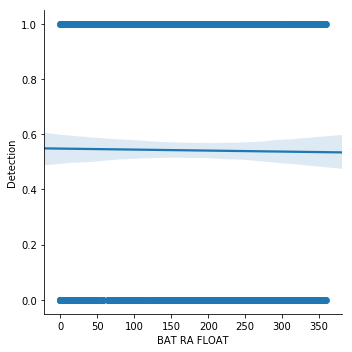

In [36]:
sns.lmplot(x='BAT RA FLOAT', y='Detection', data=df)

In [23]:
df['BAT RA FLOAT'] = df['BAT RA (J2000)'].apply(lambda bat : float(bat))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1352 entries, 0 to 1351
Data columns (total 11 columns):
GRB                                                      1352 non-null object
Swift Trigger Number                                     1352 non-null object
BAT RA (J2000)                                           1352 non-null object
BAT Dec (J2000)                                          1352 non-null object
BAT T90                                                  1352 non-null object
BAT Fluence (15-150 keV)                                 1352 non-null object
BAT Photon Index (15-150 keV) (PL = simple power-law)    1352 non-null object
Swift Comments                                           1352 non-null object
Redshift                                                 1352 non-null object
Host Galaxy                                              1351 non-null object
Detection                                                1352 non-null bool
dtypes: bool(1), object(10)
memory us

In [37]:
df.fillna(df.mean(), inplace=True)

In [38]:
df['BAT RA FLOAT'] = df['BAT RA (J2000)'].apply(lambda bat : float(bat))

ValueError: could not convert string to float: '-'

In [43]:
df['BAT RA (J2000)'].fillna(df.mean(), inplace=True)

In [44]:
df['BAT RA (J2000)']

0        91.038
1        274.26
2       268.704
3       210.358
4         7.739
5       104.227
6       169.698
7       245.839
8       299.712
9        25.877
10      167.575
11      253.574
12      346.639
13      347.708
14      265.655
15        0.528
16      336.019
17      235.085
18       38.086
19      181.687
20      212.605
21       32.605
22       48.885
23      243.569
24      318.096
25      214.528
26      357.514
27       279.89
28      169.948
29        3.073
         ...   
1322    188.485
1323    181.099
1324     89.757
1325    180.563
1326      34.41
1327    247.873
1328      6.871
1329    154.172
1330     49.695
1331    306.476
1332    282.309
1333    271.394
1334     81.306
1335    166.416
1336    174.463
1337    348.403
1338    290.584
1339    219.587
1340    278.115
1341    192.877
1342    358.479
1343    336.642
1344     79.689
1345     56.192
1346    100.204
1347    291.288
1348    343.926
1349    167.674
1350      6.154
1351    164.793
Name: BAT RA (J2000), Le

In [45]:
df['BAT RA FLOAT'] = df['BAT RA (J2000)'].apply(lambda bat : float(bat))

ValueError: could not convert string to float: '-'

In [46]:
def bat_to_float(str):
    floatVal = 0;
    try:
        floatVal = float(str)
    except:
        print(str)
        floatVal = 0
    return floatVal

In [47]:
bat_to_float("sdf")

sdf


0

In [48]:
df['BAT RA FLOAT'] = df['BAT RA (J2000)'].apply(bat_to_float)

-
-
-
-
-
-


In [49]:
df['BAT RA (J2000)'].mean()

TypeError: Could not convert 91.038274.26268.704210.3587.739104.227169.698245.839299.71225.877167.575253.574346.639347.708265.6550.528336.019235.08538.086181.687212.60532.60548.885243.569318.096214.528357.514279.89169.9483.073211.545142.343197.382201.9477.965276.335331.14464.45170.132356.8495.97435.23653.3983.54251.923196.78166.00582.905329.314157.41676.581265.422297.85599.2083.379202.675256.537126.819330.12312.0419.211149.782159.585203.078148.273212.013293.9298.154139.387167.423-186.198163.774278.392249.51288.09661.68339.26236.76634.12366.74135.635139.1522.0826.84215.464167.386128.659232.221203.949254.532276.189188.71394.375201.057187.928143.4346.404174.947238.01958.901150.05734.32245.78243.122231.851191.708129.963165.4097.358342.645286.901121.2184.723319.48890.864135.45163.42941.543159.91330.05160.49479.854219.824323.778283.331127.483284.229305.66293.087280.53913.51263.087127.145166.544271.784262.157332.861152.526341.44719.997174.382263.623332.14561.73515.23220.688267.089204.82350.84191.717245.25150.6583.857356.904316.221298.83322.053179.794180.776120.19877.906128.988142.77332.626245.687103.408112.156263.12771.923256.268295.652301.595162.249179.274183.1280.087280.005171.254288.616221.652212.76398.809190.502234.49304.166235.996168.107287.414198.238176.939330.21348.364164.41713.661234.923149.438103.57571.122265.857170.073286.389280.339319.48216.418120.2633.074349.37150.695289.705122.561146.69815.69799.42112.766183.821168.71107.311195.034164.217147.603259.851236.942311.679161.96778.17225.966150.277109.08211.916132.1920.36776.808329.363344.431214.01793.62265.0841.19229.29119.664299.70457.169120.9472.0556.85217.13983.18938.53776.188272.498271.012349.223337.647147.426213.613336.974233.722227.538319.67567.4285.677255.265183.609271.03221.034341.91342.34230.34249.635291.34782.961292.271203.96897.549218.297119.577278.481221.62483.191194.484187.627111.353314.713107.554140.0157.496327.511288.96249.044326.481292.661188.539152.305221.601190.396216.603311.505173.658192.625260.447128.173324.99138.995126.661277.004175.51589.159244.281198.787253.448285.497254.84610.076160.24198.39439.26111.8239.30910.33289.374131.674188.044312.599-138.754198.283195.058250.86639.16792.859222.804122.665222.453144.563208.614356.883128.599322.744.049241.93225.05493.60187.535291.10376.7216.3643.81291.802221.5440.384193.63848.133238.021112.184142.029-206.627271.168199.554127.244--56.3539.731171.571108.133281.14141.088146.071304.63949.26913.01249.01740.67277.163202.8278.027.096147.423322.636231.171349.939286.26186.373201.799228.81320.177227.231252.972186.071289.36646.564250.1276.806319.172102.942194.365197.276127.001195.3165.439145.032290.723207.592134.86356.975134.4175145.5409281.843184.049252.333209.293344.49730.653253.86269.521104.129105.166124.23381.328145.321326.76437.851330.999188.498325.129232.114211.91510.58585.23667.369301.309131.573344.005355.305332.714278.937332.35469.268156.4770.973348.94829.618345.08144.464290.54498.473296.10875.135253.1038.304190.725135.02841.186207.281341.9647.606215.898192.454358.635182.42627.94170.049197.09392.387269.80135.907220.256330.79214.233230.06260.6789.038179.58117.474218.8357.224181.914184.415273.128343.33620.723274.963259.771224.41453.776152.6824.597249.39292.18134.536250.166172.22286.85924.274139.405309.28287.568355.671321.555283.436147.604296.278144.77525196.654305.351137.0691.715272.459138.57974.5314.9173.15183.095196.118355.278149.045134.398214.991.984157.541236.438279.475116.77467.90158.86643.486147.524140.387173.957171.091194.307311.435190.095168.62153.708177.787195.575326.8256.7913.473300.589228.519307.33431.61783.216270.896170.772271.90363.598248.7570.481288.82166.645260.204276.029136.606303.781234.758181.042213.66146.4357.966275.73574.736235.887250.6928.31282.133273.976199.69257.184241.273216.536233.951314.223269.53144.83313.078137.085245.193230.489313.089355.412167.975169.598331.7194.703339.35380.338352.3170.886126.723214.288197.016148.692283.002136.915187.4024235.00254.30242.45858.057241.607246.854273.906291.081212.517251.812258.551273.075219.12347.549122.42620.03340.937129.862319.764130.057300.98743.08687.781203.5065249.363120.029124.86216.24317.904366.129276.22476.561150.06313.158179.193222.403349.582310.442153.091191.49314.35290.215192.924134.486336.651190.4854307.415276.057154.845154.74612.702118.248129.487265.691327.11144.785244.256108.927275.871287.029271.482153.82660.439223.315257.745294.09432.57577.548310.83197.0614164.059343.203317.37357.32289.415280.513286.71324.57237.665164.668238.895340.1208286.751308.205271.003282.045120.132134.363261.638132.7995.3112.057320.0452.16497.876133.491291.427186.022197.432251.233326.088356.51211.691338.292279.205157.5260.877150.34345.38641.76842.97869.02513.10822.48712.5492.35535164.603137.489193.871348.589329.936299.89134.15579.295245.8770.2037285.93912.25974.586241.297167.5481.955155.921172.991303.193292.218347166.3966.465317.949189.607291.37748.274328.882223.0370.672289.25315.66473.950628.69731.542172.90748.62627.25220.706351.73822.47955.283299.8462.48244.05188.753154.187290.029166.468194.569112.319255.209133.639245.693225.94315.796315.30984.618177.208263.534350.617311.1188333330.777230.7926.99304.7999328.821169.60676.263255.57589.171299.161209.453136.471296.09256.358191.59266.223356.8264290.813302.98798.612107.59932.309163.499251.953168.373195.50483.467154.202154.263124.32349.379356.44547.168141.38596.225299.30811.283.333247.029112.366132.914655.79829.4110.295138.8312203.14936.58130.945257.751137.8133112.75309.252208.72372.62260.166276.657339.24175.72732.191298.669251.1117.71256.494343.92946.31354.5126.582237.99188.046264.194100.855265.0108.29418.435128.67163.965964.4964.7488239.613225.065353.2328.665273.74129.644315.917248.681203.694251.337152.10270.09793.522289.944154.632175.888237.0382.2626313.45510.987294.008191.194252.07178.672179.4212.44611.613142.317119.957138.246164.166333.552241.422210.67290.573189.082189.531148.891294.746197.006269.32225.91209.68734.993334.95668.979239.23395.095350.9290.87190.69198.4284.978183.545245.007231.204241.764338.142220.91792.051269.1053.8486.79449.865164.00332.067251.656284.8075302.409128.24837.3339.477120.47822.74815.801328.082168.23170.485349.7735228.789233.07120.8332.075323.52689.28282.572330.7983.95224100.5331.17895.836346.776121.893245.29827.891226.584230.20914.582255.572530.184220.363279.968339.963262.3758276.57695.061265.221163.632336.289121.8213.08817.91165.741228.055301.746287.66386.79209.28163.56356.783314.231328.675270.72932.638276.871208.416121.699176.8354274.461224.481188.1048.25932.627101.822313.049355.61645.944298.4423237.667173.806213.2742194.964262.13236.96176.554279.40919.177268.44920.769280.179102.274120.6613.166322.82233.721329.467286.686165.33126.51326.138287.30137.96184.304114.678162.597169.27880.49277.906177.76399.479259.006217.919206.352155.124220.04136.629112.019199.221228.22177.927355.941231.145251.259207.51498.261261.632105.297338.974137.235225.254758.132220.039276.576299.839335.02639.218260.213289.913295.648.1796.399119.828354.163355.065340.573119.666164.685279.5018.395338.054150.531288.04151.571335.294301.857149.707253.218184.6230.127100.968293.923228.73725.8198.952189.947203.7676.761245.05736.903328.58156.29617.62927.82433.1283.14457.85342.933267.67354.707115.271323.80632.09644.3077261.716121.3552.0046.714283.717242.659121.886193.255254.219277.556237.874312.832347.203328.006297.69528.871121.245315.709182.755181.525107.342198.956269.53365.11340.33748.48687.5411263.6848148.154120.578178.988153.45334.8260.2246.213197.89136.99533.503117.850.934159.422352.581105.353358.254149.26160.403144.521105.255332.07986.615303.837147.228323.912336.284148.39497.193270.992300.9121145.14691.67546.299110.99897.795220.356263.148329.547263.926346.122238.193254.623276.95.28531.82840.70958.218237.731287.1575818.132221.338111.89252.52220.928112.219212.98995.28716.64418.42170.857227.855184.0677.831357.069320.87742.043329.705322.128337.224149.579232.834322.95471.17127.277195.748239.25995.8689.911331.772278.927240.937328.374235.369123.54124.1777.359343.629236.431291.287282.338174.421274.23176.37966.62545.7841.097254.23855.186241.85150.3875.08558.38157.727202.933211.805103.46335.80977.097179.75137.488327.91284.69854.007286.456276.19372.737282.735147.013297.485328.839125.231312.378328.715252.084345.688330.19285.205228.398226.29187.242348.136345.469330.316265.279-359.0126.05929.1132.123122.814270.513202.865110.807350.984303.49317.3835.79135.979219.10981.68813.7120.45752.80213.7764.29487.76112.26451.106135.607337.416358.751293.584264.196242.001350.65219.283204.144212.069200.024246.175253.453214.348338.593155.641169.69143.5863307.821320.58577.722227.241300.1839.982353.524278.142200.1468192.5087189.046310.57348.063141.76200.9986142.535324.507307.34144.334133.848188.485181.09989.757180.56334.41247.8736.871154.17249.695306.476282.309271.39481.306166.416174.463348.403290.584219.587278.115192.877358.479336.64279.68956.192100.204291.288343.926167.6746.154164.793 to numeric

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1352 entries, 0 to 1351
Data columns (total 12 columns):
GRB                                                      1352 non-null object
Swift Trigger Number                                     1352 non-null object
BAT RA (J2000)                                           1352 non-null object
BAT Dec (J2000)                                          1352 non-null object
BAT T90                                                  1352 non-null object
BAT Fluence (15-150 keV)                                 1352 non-null object
BAT Photon Index (15-150 keV) (PL = simple power-law)    1352 non-null object
Swift Comments                                           1352 non-null object
Redshift                                                 1352 non-null object
Host Galaxy                                              1351 non-null object
Detection                                                1352 non-null bool
BAT RA FLOAT                         

In [51]:
df['BAT Dec (J2000)'].iloc[0]

'-4.592'

In [53]:
df['BAT DEC FLOAT'] = df['BAT Dec (J2000)'].apply(lambda s : float(s))

ValueError: could not convert string to float: '-'

In [ ]:
def bat_to_float(str):
    floatVal = 0;
    try:
        floatVal = float(str)
    except:
        print(str)
        floatVal = 0
    return floatVal

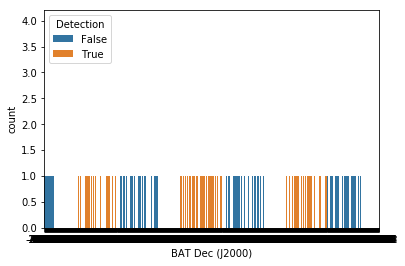

In [54]:
sns.countplot(x='BAT Dec (J2000)', data=df, hue='Detection')


In [ ]:
sns.countplot(x='BAT Dec (J2000)', data=df, hue='Detection')
plt.tight_layout()

In [ ]:
sns.countplot(x='BAT DEC FLOAT', data=df, hue='Detection')
plt.tight_layout()

In [ ]:
df.info()

In [ ]:
sns.lmplot(x='BAT RA (J2000)', y='Detection', data=df)

AttributeError: 'str' object has no attribute 'conjugate'